<a href="https://colab.research.google.com/github/Pratik426/Pratik42/blob/main/heart%20disease%20diagnostic%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Creating a sample heart disease dataset
np.random.seed(42)
data = {
    'age': np.random.randint(29, 77, size=300),
    'sex': np.random.choice([0, 1], size=300),
    'cp': np.random.randint(0, 4, size=300),
    'trestbps': np.random.randint(94, 200, size=300),
    'chol': np.random.randint(126, 564, size=300),
    'fbs': np.random.choice([0, 1], size=300),
    'restecg': np.random.randint(0, 3, size=300),
    'thalach': np.random.randint(71, 202, size=300),
    'exang': np.random.choice([0, 1], size=300),
    'oldpeak': np.random.uniform(0, 6.2, size=300),
    'slope': np.random.randint(0, 3, size=300),
    'ca': np.random.randint(0, 4, size=300),
    'thal': np.random.choice([1, 2, 3], size=300),
    'target': np.random.choice([0, 1], size=300)
}

df = pd.DataFrame(data)

# Save to CSV
file_path = 'heart_disease_data.csv'
df.to_csv(file_path, index=False)

# Display the first few rows of the dataset
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   67    1   1       140   238    1        1      109      0  5.747406   
1   57    1   2       118   265    0        0       85      0  3.347734   
2   43    1   3       159   172    1        1      189      0  5.220606   
3   71    0   0       103   126    0        1       99      1  3.229939   
4   36    1   0       149   215    0        2      145      0  3.866231   

   slope  ca  thal  target  
0      1   2     2       0  
1      2   3     1       1  
2      1   3     2       1  
3      0   0     3       0  
4      1   0     1       0  


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   67    1   1       140   238    1        1      109      0  5.747406   
1   57    1   2       118   265    0        0       85      0  3.347734   
2   43    1   3       159   172    1        1      189      0  5.220606   
3   71    0   0       103   126    0        1       99      1  3.229939   
4   36    1   0       149   215    0        2      145      0  3.866231   

   slope  ca  thal  target  
0      1   2     2       0  
1      2   3     1       1  
2      1   3     2       1  
3      0   0     3       0  
4      1   0     1       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang 

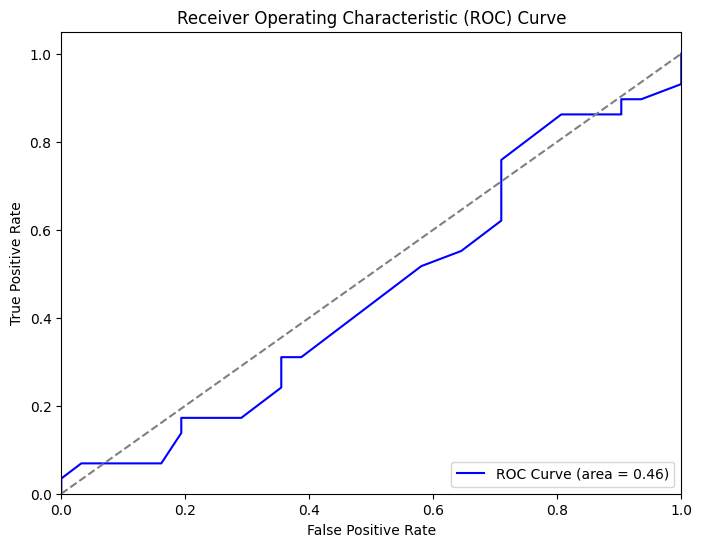

ROC AUC Score: 0.45606229143492766
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.5333333333333334
Best Random Forest Accuracy: 0.48333333333333334
Confusion Matrix:
 [[19 12]
 [19 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.61      0.55        31
           1       0.45      0.34      0.39        29

    accuracy                           0.48        60
   macro avg       0.48      0.48      0.47        60
weighted avg       0.48      0.48      0.47        60



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Load the dataset
file_path = 'heart_disease_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check the data types of each column
print(data.dtypes)

# Convert categorical variables to dummy/indicator variables if necessary
# Assuming 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal' are categorical:
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

# Features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve and AUC for the best model (let's assume Random Forest is the best)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC Score:", roc_auc)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_rf_clf = grid_search.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))
